# 문제1: 경험적으로 추천해보기

## 수행목표

- 본인만의 기준으로 영화를 추천하는 코드를 개발한다.

## 수행단계

- 데이터는 제공되는 파일인 prob-0101.csv를 사용한다.
- 영화 개수, 배급사 수, 감독 수, 출연진 수, 장르 수를 파악한다.
- 감독, 출연진 등 중복 조건들에 대해 파악한다.
- 본인이 추천하고 싶은 기준을 설정한다.
- 본인의 기준에 의해 영화 몇개를 추천하는 것이 적당한지 실험해 본다.
- 다양한 접근 조회 방법을 실험한다. (감독, 출연진 중복, 장르별 등)
- 개인별로 정한 기준이 서로 어떻게 다른지 확인한다.

## 개념정리

#### 추천
- 어떤 조건에 부합하는 대상을 소개하는 것

#### 추천 알고리즘
- 데이터 (사용자 정보) 를 기반으로 (이를 일정한 규칙에 따라 분류하여) 사용자가 선호할만한 콘텐츠를 제안하는 기술

In [2]:
# Python 가상환경 설정 및 패키지 설치
# %python3 -m venv .venv
# %source .venv/bin/activate

In [3]:
# %python3 -m pip install pandas
# %python3 -m pip install matplotlib
# %python3 -m pip install seaborn
# %python3 -m pip install ipywidgets

## 0. 라이브러리 import 및 파일 읽기

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import Markdown as md, clear_output

df = pd.read_csv("prob-0101.csv")
df.head()

,개봉일,제목,배급사,감독,출연진,장르
0,2023-01-04,스위치,"롯데컬처웍스, (주)롯데엔터테인먼트",마대윤,"권상우, 오정세, 이민정, 박소이, 김준",기타
1,2023-01-05,강남좀비,(주)와이드릴리즈,이수성,"지일주, 지연",드라마
2,2023-01-12,별 볼일 없는 인생,(주)이놀미디어,서동현,정가은,멜로/로맨스
3,2023-01-12,10일간의 애인,(주)그노스,이영용,송민경,멜로/로맨스
4,2023-01-18,교섭,플렉스엠엔터테인먼트,임순례,"황정민, 현빈, 강기영",드라마


## 1. 데이터 조회 및 검사

In [5]:
# 열 / 행 개수 확인
print("Column count: ", len(df.columns))
print("Row count: ", len(df))
# df.shape 으로도 확인 가능

Column count:  6
Row count:  59


In [6]:
# 열 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   개봉일     59 non-null     object
 1   제목      59 non-null     object
 2   배급사     59 non-null     object
 3   감독      59 non-null     object
 4   출연진     59 non-null     object
 5   장르      59 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB


### 기본 정보

In [7]:
num_movies = df['제목'].nunique()
print("Number of unique movies:", num_movies)

num_directors = df['감독'].nunique()
print("Number of unique directors:", num_directors)

Number of unique movies: 59
Number of unique directors: 58


In [8]:
top_directors = df['감독'].value_counts()
print(top_directors.head(10))

감독
최윤호     2
마대윤     1
장형모     1
최세환     1
이송희일    1
신근호     1
홍상수     1
양경희     1
이원석     1
조은성     1
Name: count, dtype: int64


In [9]:
top_directors = top_directors[top_directors == top_directors.max()]
print(f"Most frequent director(s) with {top_directors.values[0]} movies: {', '.join(top_directors.index)}")

Most frequent director(s) with 2 movies: 최윤호


In [10]:
df['출연진'] = df['출연진'].fillna('').astype(str)
actors_series = df['출연진'].apply(lambda x: [a.strip() for a in x.split(',') if a.strip() != ''])

all_actors = actors_series.explode()
unique_actors = all_actors.nunique()
print("Number of unique actors/actresses:", unique_actors)

Number of unique actors/actresses: 262


In [11]:
actor_counts = all_actors.value_counts()
print("Top 10 most frequent actors:\n", actor_counts.head(10))

Top 10 most frequent actors:
 출연진
이하늬    3
고규필    2
고창석    2
차선우    2
소이     2
박상욱    2
김시은    2
박성웅    2
강길우    2
양현민    2
Name: count, dtype: int64


In [12]:
most_common_actors = actor_counts[actor_counts == actor_counts.max()]
print(most_common_actors)

출연진
이하늬    3
Name: count, dtype: int64


In [13]:
df['장르'] = df['장르'].fillna('').astype(str)

# Note: Some genres might be separated by commas. Also notice that some rows have '멜로·로맨스·코미디' with "·" not a comma
# Let's unify separators. Replace '·' with comma for consistency if needed.
df['장르'] = df['장르'].str.replace('·', ',', regex=False)

genres_series = df['장르'].apply(lambda x: [g.strip() for g in x.split(',') if g.strip() != ''])
all_genres = genres_series.explode()
unique_genres = all_genres.nunique()
print("Number of unique genres:", unique_genres)

genre_counts = all_genres.value_counts()
print("Genre frequency:\n", genre_counts)


Number of unique genres: 14
Genre frequency:
 장르
드라마       31
액션         8
멜로         8
코미디        8
로맨스        7
범죄         4
스릴러        3
기타         2
멜로/로맨스     2
공포         2
SF         1
가족         1
다큐멘터리      1
미스터리       1
Name: count, dtype: int64


In [14]:
most_common_genres = genre_counts[genre_counts == genre_counts.max()]
print(most_common_genres)

장르
드라마    31
Name: count, dtype: int64


In [15]:
# Note: Some 배급사 might be separated by commas. Split and count all 배급사
# Note: Some 배급사 has (주) or ㈜ which indicates coorporation. We can remove them for better grouping.
df['배급사'] = df['배급사'].fillna('').astype(str)
distributors_series = df['배급사'].apply(lambda x: [d.strip().replace('(주)', '').replace('㈜', '').strip() for d in x.split(',') if d.strip() != ''])
all_distributors = distributors_series.explode()
unique_distributors = all_distributors.nunique()
print("Number of unique distributors:", unique_distributors)
print("Distributors:\n", all_distributors.value_counts())

Number of unique distributors: 48
Distributors:
 배급사
롯데컬처웍스           2
필름 다빈            2
넥스트엔터테인먼트월드      2
롯데엔터테인먼트         2
제이앤씨미디어그룹        2
트리플픽쳐스           2
CJ CGV           2
트윈플러스파트너스        2
스토리제이            2
넷플릭스             2
CJ ENM           2
플렉스엠엔터테인먼트       2
이놀미디어            2
와이드릴리즈           2
인디스토리            2
영화사오윈            1
콘텐츠판다            1
삼거리픽쳐스           1
시네마 뉴원           1
넥스트엔터테인먼트        1
스튜디오 에이드         1
디스테이션            1
TCO더콘텐츠온         1
씨에스픽쳐스           1
시네마달             1
에이비오엔터테인먼트       1
CJ엔터테인먼트         1
시네마뉴원            1
씨엠닉스             1
이눌미디어            1
영화제작전원사          1
바른손이앤아이          1
아웃런브라더스픽쳐스       1
엣나인필름            1
드림팩트엔터테인먼트       1
영화사 진진           1
M&M 인터내셔널        1
영화배급협동조합 씨네소파    1
플레이그램            1
콘텐츠윙             1
영화사 순수           1
플러스엠엔터테인먼트       1
와이웍스엔터테인먼트       1
다자인소프트           1
콘텐츠존             1
영화특별시 에스엠씨       1
그노스              1
원더스튜디오           1
Name: count, dtype: int64


In [16]:
most_common_distributors = all_distributors.value_counts()
most_common_distributors = most_common_distributors[most_common_distributors == most_common_distributors.max()]
print(most_common_distributors)

배급사
롯데컬처웍스         2
필름 다빈          2
넥스트엔터테인먼트월드    2
롯데엔터테인먼트       2
제이앤씨미디어그룹      2
트리플픽쳐스         2
CJ CGV         2
트윈플러스파트너스      2
스토리제이          2
넷플릭스           2
CJ ENM         2
플렉스엠엔터테인먼트     2
이놀미디어          2
와이드릴리즈         2
인디스토리          2
Name: count, dtype: int64


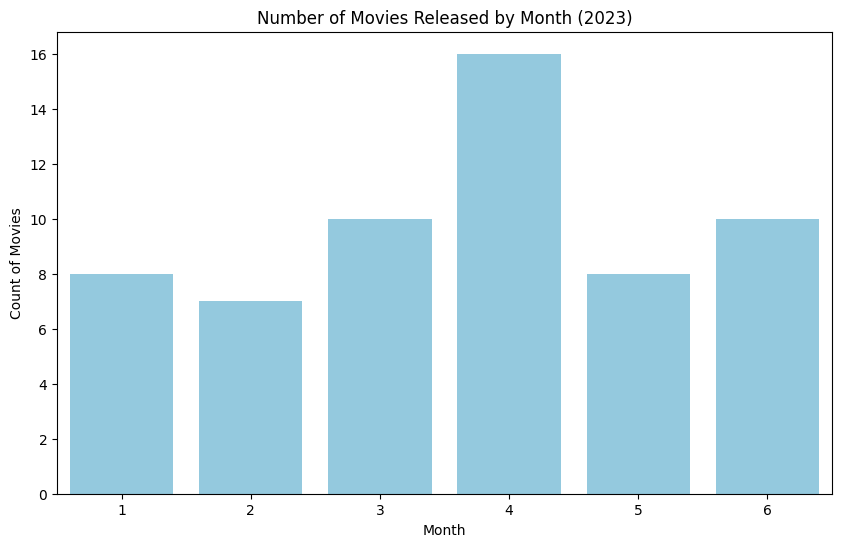

In [17]:
# Convert 개봉일 to datetime
df['개봉일'] = pd.to_datetime(df['개봉일'], format='%Y-%m-%d', errors='coerce')

# Extract month
df['month'] = df['개봉일'].dt.month

# Count how many movies per month
movies_per_month = df['month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=movies_per_month.index, y=movies_per_month.values, color='skyblue')
plt.title('Number of Movies Released by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Count of Movies')
plt.show()


### 정보 요약

In [18]:
# use md() to display markdown
# Display most common actor, genre, distributor, and month when most movies are released
# if the count is same, it will display all of them
md(f"""
### Most Common Actor:
- {', '.join(most_common_actors.index)}
### Most Common Genre
- {', '.join(most_common_genres.index)}
### Most Common Distributor
- {', '.join(most_common_distributors.keys())}
### Month with Most Movies Released
- {', '.join(movies_per_month[movies_per_month == movies_per_month.max()].index.astype(str))}
""")


### Most Common Actor:
- 이하늬
### Most Common Genre
- 드라마
### Most Common Distributor
- 롯데컬처웍스, 필름 다빈, 넥스트엔터테인먼트월드, 롯데엔터테인먼트, 제이앤씨미디어그룹, 트리플픽쳐스, CJ CGV, 트윈플러스파트너스, 스토리제이, 넷플릭스, CJ ENM, 플렉스엠엔터테인먼트, 이놀미디어, 와이드릴리즈, 인디스토리
### Month with Most Movies Released
- 4


## 2. 추천 기준 설정

### 가설 1: 많이 개봉된 장르가 인기있는 장르일 것이다.

In [19]:
md(f"""
   ### 최다 개봉 장르: {'/'.join(most_common_genres.index)}
""")


   ### 최다 개봉 장르: 드라마


In [20]:
most_common_genre = most_common_genres.index[0]
most_common_genre_movies = df[df['장르'].str.contains(most_common_genre)]
most_common_genre_movies[['제목', '장르', '배급사', '출연진']]

,제목,장르,배급사,출연진
1,강남좀비,드라마,(주)와이드릴리즈,"지일주, 지연"
4,교섭,드라마,플렉스엠엔터테인먼트,"황정민, 현빈, 강기영"
7,"열여덟, 어른이 되는 나이",드라마,필름 다빈,"임선우, 김명찬, 이장유, 박현숙"
8,다음 소희,드라마,트윈플러스파트너스,"김시은, 배두나, 박우영, 정수하"
9,어쩌면 우린 헤어졌는지 모른다,드라마,(주)영화특별시 에스엠씨,"이동휘, 정은채, 강길우, 정다은"
12,카운트,드라마,(주)CJ ENM,"진선규, 성유빈, 오나라, 고창석, 장동주, 고규필"
14,컨버세이션,드라마,필름 다빈,"조은지, 박종환, 곽민규, 소이, 송은지, 곽진무"
15,멍뭉이,드라마,(주)와이웍스엔터테인먼트,"유연석, 차태현"
16,대외비,"범죄, 드라마",플러스엠엔터테인먼트,"조진웅, 이성민, 김무열"
17,그대 어이가리,드라마,(주)영화사 순수,"선동혁, 정아미, 박종진"


### 가설 2: 많이 출연한 배우가 맡은 영화가 인기있을 것이다.

In [21]:
md(f"""
   ### 최다 출연 배우: {', '.join(most_common_actors.index)}
""")


   ### 최다 출연 배우: 이하늬


In [22]:
# Display movies with most common actors
most_common_actor_movies = df[df['출연진'].str.contains(most_common_actors.index[0])]
most_common_actor_movies[['제목', '출연진', '장르', '배급사']]

,제목,출연진,장르,배급사
5,유령,"설경구, 이하늬, 박소감, 박해수, 서현우, 김동희",액션,(주)CJ ENM
36,킬링 로맨스,"이하늬, 이선균, 공명, 김상욱",코미디,"롯데컬처웍스, (주)롯데엔터테인먼트"
39,드림,"박서준, 아이유, 김종수, 고창석, 정승길, 이현우, 양현민, 홍완표, 허준석, 이하늬",드라마,(주)플렉스엠엔터테인먼트


### 가설 3: 영화를 많이 배급한 영화 배급사는 인기있는 영화를 골랐을 것이다.

In [23]:
md(f"""
   ### 최다 배급 영화 배급사: {', '.join(most_common_distributors.keys())}
""")


   ### 최다 배급 영화 배급사: 롯데컬처웍스, 필름 다빈, 넥스트엔터테인먼트월드, 롯데엔터테인먼트, 제이앤씨미디어그룹, 트리플픽쳐스, CJ CGV, 트윈플러스파트너스, 스토리제이, 넷플릭스, CJ ENM, 플렉스엠엔터테인먼트, 이놀미디어, 와이드릴리즈, 인디스토리


In [24]:
most_common_distributor_movies = df[df['배급사'].str.contains('|'.join(most_common_distributors.keys()))]
most_common_distributor_movies[['제목', '배급사', '장르', '출연진']]

,제목,배급사,장르,출연진
0,스위치,"롯데컬처웍스, (주)롯데엔터테인먼트",기타,"권상우, 오정세, 이민정, 박소이, 김준"
1,강남좀비,(주)와이드릴리즈,드라마,"지일주, 지연"
2,별 볼일 없는 인생,(주)이놀미디어,멜로/로맨스,정가은
4,교섭,플렉스엠엔터테인먼트,드라마,"황정민, 현빈, 강기영"
5,유령,(주)CJ ENM,액션,"설경구, 이하늬, 박소감, 박해수, 서현우, 김동희"
6,정이,넷플릭스,SF,"강수연, 김현주, 류경수"
7,"열여덟, 어른이 되는 나이",필름 다빈,드라마,"임선우, 김명찬, 이장유, 박현숙"
8,다음 소희,트윈플러스파트너스,드라마,"김시은, 배두나, 박우영, 정수하"
11,스마트폰을 떨어뜨렸을 뿐인데,넷플릭스,스릴러,"천우희, 임시완, 김희원"
12,카운트,(주)CJ ENM,드라마,"진선규, 성유빈, 오나라, 고창석, 장동주, 고규필"


In [25]:
for distributor in most_common_distributors.keys():
    distributor_movies = df[df['배급사'].str.contains(distributor)]
    display(distributor_movies[['제목', '배급사', '장르', '출연진']])


,제목,배급사,장르,출연진
0,스위치,"롯데컬처웍스, (주)롯데엔터테인먼트",기타,"권상우, 오정세, 이민정, 박소이, 김준"
36,킬링 로맨스,"롯데컬처웍스, (주)롯데엔터테인먼트",코미디,"이하늬, 이선균, 공명, 김상욱"


,제목,배급사,장르,출연진
7,"열여덟, 어른이 되는 나이",필름 다빈,드라마,"임선우, 김명찬, 이장유, 박현숙"
14,컨버세이션,필름 다빈,드라마,"조은지, 박종환, 곽민규, 소이, 송은지, 곽진무"


,제목,배급사,장르,출연진
18,소울메이트,(주)넥스트엔터테인먼트월드,드라마,"김다미, 전소니, 변우석"
54,귀공자,(주)넥스트엔터테인먼트월드,액션,"김선호, 강태주, 김강우, 고아라"


,제목,배급사,장르,출연진
0,스위치,"롯데컬처웍스, (주)롯데엔터테인먼트",기타,"권상우, 오정세, 이민정, 박소이, 김준"
36,킬링 로맨스,"롯데컬처웍스, (주)롯데엔터테인먼트",코미디,"이하늬, 이선균, 공명, 김상욱"


,제목,배급사,장르,출연진
13,살수,(주)제이앤씨미디어그룹,액션,"신현준, 이문식, 김민경, 홍은기, 최성원"
57,아수라장: 범털들의 전쟁,(주)제이앤씨미디어그룹,범죄,"정영주, 안미나, 배진아, 한가은"


,제목,배급사,장르,출연진
27,오늘 출가합니다,(주)트리플픽쳐스,드라마,"양홍주, 나현준"
58,라방,트리플픽쳐스,스릴러,"박성웅, 박선호, 김희정"


,제목,배급사,장르,출연진
22,웅남이,(주)CJ CGV,"코미디, 액션","박성웅, 이이경, 염혜란, 최민수, 오달수, 윤제문, 백지혜, 서동원, 한다솔"
35,밥만 잘 사주는 이상한 이사님 극장판,CJ CGV,"드라마,멜로","박정우, 박영훈"


,제목,배급사,장르,출연진
8,다음 소희,트윈플러스파트너스,드라마,"김시은, 배두나, 박우영, 정수하"
50,익스트림 페스티벌,트윈플러스파트너스(주),코미디,"김재화, 조민재, 박강섭"


,제목,배급사,장르,출연진
29,솔라 플라워,㈜스토리제이,"멜로,로맨스,드라마","오원빈, 서지희, 심현탁, 박정철, 김수하, 김민, 김봉주, 조수빈, 정병훈"
45,남자는 처음을 원하고 여자는 마지막을 원한다,(주)스토리제이,"멜로,로맨스","윤성모, 정미미, 장원혁"


,제목,배급사,장르,출연진
6,정이,넷플릭스,SF,"강수연, 김현주, 류경수"
11,스마트폰을 떨어뜨렸을 뿐인데,넷플릭스,스릴러,"천우희, 임시완, 김희원"


,제목,배급사,장르,출연진
5,유령,(주)CJ ENM,액션,"설경구, 이하늬, 박소감, 박해수, 서현우, 김동희"
12,카운트,(주)CJ ENM,드라마,"진선규, 성유빈, 오나라, 고창석, 장동주, 고규필"


,제목,배급사,장르,출연진
4,교섭,플렉스엠엔터테인먼트,드라마,"황정민, 현빈, 강기영"
39,드림,(주)플렉스엠엔터테인먼트,드라마,"박서준, 아이유, 김종수, 고창석, 정승길, 이현우, 양현민, 홍완표, 허준석, 이하늬"


,제목,배급사,장르,출연진
2,별 볼일 없는 인생,(주)이놀미디어,멜로/로맨스,정가은
53,실버맨,(주)이놀미디어,드라마,"김정팔, 박상욱, 신의현, 이경준, 유재인"


,제목,배급사,장르,출연진
1,강남좀비,(주)와이드릴리즈,드라마,"지일주, 지연"
33,나는 여기에 있다,와이드릴리즈(주),"범죄,액션,스릴러","조한선, 정지운, 정태우, 노수산나, 박순천, 정인기, 이지원"


,제목,배급사,장르,출연진
20,여섯 개의 밤,(주)인디스토리,"드라마, 멜로,로맨스, 가족","강길우, 강진아, 김시은, 변중희, 이한주, 정수지"
47,드림팰리스,(주)인디스토리,드라마,"김선영, 이윤지, 최민영, 김용준"


### 가설 4: 영화를 많이 제작한 감독은 투자받을 (대중성이 있는 영화를 만들) 줄 아는 감독일 것이다.

In [26]:
md(f"""
   ### 최다 영화 개봉 감독: {', '.join(top_directors.index)}
""")


   ### 최다 영화 개봉 감독: 최윤호


In [27]:
most_common_director_movies = df[df['감독'].str.contains('|'.join(top_directors.index))]
most_common_director_movies[['제목', '감독', '장르', '출연진']]

,제목,감독,장르,출연진
53,실버맨,최윤호,드라마,"김정팔, 박상욱, 신의현, 이경준, 유재인"
55,손,최윤호,"공포,코미디","이재원, 박상욱, 정서하, 허웅, 안수호"


## 3. 추천 갯수 설정

### 이론 1: Single-Option Aversion (단일 옵션 회피)
- 소비자가 다른 옵션이 제공되지 않을 때, (자신이 좋아하는 옵션이라도) 선택하기를 꺼리는 현상

출처: [Single-option Aversion definition](https://tactics.convertize.com/definitions/single-option-aversion)

### 이론 2: Paradox of Choice (선택의 역설)
- 선택 가능한 옵션이 많아질수록, 해당 결정에 대한 만족도가 낮아진다는 점을 시사 (심리학자 Barry Schwartz)
  - 이는 선택 가능한 옵션이 너무 많을 시, 각 사항을 인지하기 위한 인지적 노력이 더 많이 필요하기 때문에 의사 결정에서 발생하는 피로감 내리는 선택에 대한 후회가 증가하기 때문에 발생함

출처: [The Paradox of Choice](https://thedecisionlab.com/reference-guide/economics/the-paradox-of-choice)

### 이론 3: 소비자는 한번에 7 (±2) 개의 선택지까지 처리할 수 있음
- 밀러 (1956) 의 연구에 따르면, 소비자는 한번에 약 7가지의 선택지를 인식 후, 인식한 정보로 최적의 선택을 하기 위한 전략을 세우는 경향을 보임
- 선택지가 너무 많을 경우, 소비자들은 선택을 아예 하지 않는 것을 선호할 때도 있음

출처: [Miller, George A. (1956). "The magical number seven, plus or minus two: some limits on our capacity for processing information"](https://psycnet.apa.org/doiLanding?doi=10.1037%2Fh0043158)

### 결론
- 8개
  - 이유: 위 이론들을 따르면서 화면 (웹 어플리케이션) 상에서 예쁘지만 허하지 않게 보일 영화의 수가 8개일 것 같음

## 4. 최종 결과

In [28]:
most_common_genre = most_common_genres.index[0]
most_common_actor = most_common_actors.index[0]

# 배급사와 감독은 여러명이므로 리스트로 변환
list_most_common_distributors = list(most_common_distributors.keys())
list_top_directors = list(top_directors.index)

# Multiple Selecton 위젯 생성
hypothesis_selector = widgets.SelectMultiple(
    options=[
        ('가설 1 - 장르', 'H1'),
        ('가설 2 - 배우', 'H2'),
        ('가설 3 - 배급사', 'H3'),
        ('가설 4 - 감독', 'H4'),
    ],
    value=[],
    description='가설 선택:',
    disabled=False
)

# 선택된 가설에 따라 데이터 필터링
def filter_movies(hypotheses):
    """
    Filter the DataFrame based on the chosen hypotheses.
    Return up to 8 recommended movies.
    """
    filtered_df = df.copy()
    
    if 'H1' in hypotheses:
        filtered_df = filtered_df[filtered_df['장르'].str.contains(most_common_genre)]
    
    if 'H2' in hypotheses:
        filtered_df = filtered_df[filtered_df['출연진'].str.contains(most_common_actor)]
    
    if 'H3' in hypotheses:
        pattern = '|'.join(list_most_common_distributors)
        filtered_df = filtered_df[filtered_df['배급사'].str.contains(pattern)]
    
    if 'H4' in hypotheses:
        pattern_directors = '|'.join(list_top_directors)
        filtered_df = filtered_df[filtered_df['감독'].str.contains(pattern_directors)]
    
    return filtered_df

# 위젯 변경 이벤트 처리 (콜백 함수)
def on_hypothesis_change(change):
    # Dict 의 'new' 키에 선택된 가설이 들어있음
    selected_hypotheses = change['new']
    
    # 이전 출력 내용 지우기
    clear_output(wait=True)
    
    # 위젯 제출력
    display(hypothesis_selector)
    
    # 아무 가설도 선택되지 않았을 때
    if not selected_hypotheses:
        print("No hypothesis selected. Please select at least one.")
        return
    
    result_df = filter_movies(selected_hypotheses)
    
    print(f"Total found: {len(result_df)}")
    
    # Show top 8
    display(result_df[['제목', '감독', '배급사', '출연진', '장르']].head(8))

# 위젯과 콜백 함수 연결
hypothesis_selector.observe(on_hypothesis_change, names='value')

display(hypothesis_selector)


SelectMultiple(description='가설 선택:', index=(0,), options=(('가설 1 - 장르', 'H1'), ('가설 2 - 배우', 'H2'), ('가설 3 - 배…

Total found: 31


,제목,감독,배급사,출연진,장르
1,강남좀비,이수성,(주)와이드릴리즈,"지일주, 지연",드라마
4,교섭,임순례,플렉스엠엔터테인먼트,"황정민, 현빈, 강기영",드라마
7,"열여덟, 어른이 되는 나이",주영,필름 다빈,"임선우, 김명찬, 이장유, 박현숙",드라마
8,다음 소희,정주리,트윈플러스파트너스,"김시은, 배두나, 박우영, 정수하",드라마
9,어쩌면 우린 헤어졌는지 모른다,형슬우,(주)영화특별시 에스엠씨,"이동휘, 정은채, 강길우, 정다은",드라마
12,카운트,권혁재,(주)CJ ENM,"진선규, 성유빈, 오나라, 고창석, 장동주, 고규필",드라마
14,컨버세이션,김덕중,필름 다빈,"조은지, 박종환, 곽민규, 소이, 송은지, 곽진무",드라마
15,멍뭉이,김주환,(주)와이웍스엔터테인먼트,"유연석, 차태현",드라마
